**5.1合并与分割**

In [1]:
import tensorflow as tf

#5.1.1 合并
a = tf.random.normal([4, 35, 8])
b = tf.random.normal([6, 35, 8])
tf.concat([a, b], axis=0).shape

TensorShape([10, 35, 8])

In [3]:
a = tf.random.normal([10, 35, 4])
b = tf.random.normal([10, 35, 4])
tf.concat([a, b], axis=-1).shape

TensorShape([10, 35, 8])

In [4]:
a=tf.random.normal([4,32,8])
b=tf.random.normal([6,35,8])
tf.concat([a, b], axis=0).shape

InvalidArgumentError: ignored

In [5]:
a=tf.random.normal([35,8])
b=tf.random.normal([35,8])
tf.stack([a,b],axis=0).shape

TensorShape([2, 35, 8])

In [6]:
a=tf.random.normal([35,8])
b=tf.random.normal([35,8])
tf.stack([a,b],axis=-1).shape

TensorShape([35, 8, 2])

In [7]:
a=tf.random.normal([35,8])
b=tf.random.normal([35,8])
tf.concat([a,b],axis=0).shape

TensorShape([70, 8])

In [8]:
#5.1.2 分割
x = tf.random.normal([10, 35, 8])
result = tf.split(x, axis=0, num_or_size_splits=10)
len(result)

10

In [9]:
result[0].shape

TensorShape([1, 35, 8])

In [10]:
x=tf.random.normal([10,35,8])
result=tf.split(x,axis=0,num_or_size_splits=[4,2,2,2])
len(result)

4

In [11]:
for i in result:
  print(i.shape)

(4, 35, 8)
(2, 35, 8)
(2, 35, 8)
(2, 35, 8)


In [12]:
x=tf.random.normal([10,35,8])
result=tf.unstack(x,axis=0)
len(result)

10

In [13]:
for i in result:
  print(i.shape)

(35, 8)
(35, 8)
(35, 8)
(35, 8)
(35, 8)
(35, 8)
(35, 8)
(35, 8)
(35, 8)
(35, 8)


**5.2数据统计**

In [14]:
#5.2.1 向量范数
import numpy as np
x = tf.ones([2, 2])
tf.norm(x, ord=1)

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [15]:
tf.norm(x, ord=2)

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [16]:
tf.norm(x, ord=np.inf)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [17]:
tf.norm(x, ord=4)

<tf.Tensor: shape=(), dtype=float32, numpy=1.4142135>

In [18]:
#5.2.1 最大值最小值、均值、和
x=tf.random.normal([4,10])
tf.reduce_max(x,axis=1)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([2.17236  , 0.6215225, 0.8500117, 1.6450207], dtype=float32)>

In [19]:
tf.reduce_max(x,axis=0).shape

TensorShape([10])

In [20]:
tf.reduce_min(x,axis=1)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-1.2870907, -1.5206989, -2.2794259, -1.3225509], dtype=float32)>

In [21]:
tf.reduce_mean(x,axis=1)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.06754635, -0.6649321 , -0.32570493,  0.27871436], dtype=float32)>

In [22]:
x=tf.random.normal([4,10])
tf.reduce_max(x),tf.reduce_min(x),tf.reduce_mean(x)

(<tf.Tensor: shape=(), dtype=float32, numpy=1.9854782>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-1.6729066>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.119772516>)

In [23]:
out=tf.random.normal([4,10])
y=tf.constant([1,2,2,0])
y=tf.one_hot(y,depth=10)
loss=tf.keras.losses.mse(y,out)
loss.shape

TensorShape([4])

In [24]:
tf.reduce_mean(loss)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0422329>

In [25]:
out=tf.random.normal([4,10])
tf.reduce_sum(out,axis=-1)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.27289915, -0.8867123 , -0.02577731, -0.1951837 ], dtype=float32)>

In [26]:
out=tf.random.normal([2,10])
out=tf.nn.softmax(out,axis=1)
out.shape

TensorShape([2, 10])

In [27]:
out

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0.05079234, 0.02290803, 0.14135441, 0.26086   , 0.09449354,
        0.24580686, 0.04847836, 0.07045203, 0.05329485, 0.01155955],
       [0.14481726, 0.25749022, 0.12102248, 0.04325606, 0.0203485 ,
        0.00622755, 0.01002354, 0.08830141, 0.02002686, 0.28848615]],
      dtype=float32)>

In [28]:
pred=tf.argmax(out,axis=1)
pred

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([3, 9])>

**5.3张量比较**

In [29]:
out=tf.random.normal([100,10])
out=tf.nn.softmax(out,axis=1)
pred=tf.argmax(out,axis=1)
pred

<tf.Tensor: shape=(100,), dtype=int64, numpy=
array([8, 2, 7, 8, 6, 5, 8, 1, 2, 5, 4, 9, 9, 2, 6, 0, 2, 7, 1, 4, 5, 9,
       4, 0, 6, 7, 6, 0, 5, 1, 4, 1, 4, 1, 0, 1, 7, 2, 1, 0, 4, 7, 5, 8,
       2, 1, 5, 8, 2, 3, 2, 2, 0, 8, 3, 1, 2, 1, 3, 1, 4, 1, 8, 7, 1, 1,
       4, 0, 3, 7, 6, 8, 4, 9, 6, 0, 5, 2, 4, 6, 0, 2, 8, 3, 2, 1, 4, 7,
       4, 7, 0, 0, 9, 1, 6, 2, 8, 2, 9, 1])>

In [30]:
y=tf.random.uniform([100],dtype=tf.int64,maxval=10)
y

<tf.Tensor: shape=(100,), dtype=int64, numpy=
array([2, 4, 0, 4, 0, 6, 3, 9, 2, 7, 0, 7, 9, 5, 8, 4, 5, 5, 2, 8, 8, 7,
       3, 3, 0, 4, 1, 3, 1, 5, 5, 6, 7, 0, 2, 0, 8, 8, 6, 8, 7, 5, 4, 5,
       7, 5, 3, 9, 0, 9, 9, 3, 4, 4, 1, 4, 9, 8, 8, 9, 3, 5, 2, 9, 3, 6,
       0, 7, 7, 6, 3, 9, 4, 4, 0, 9, 8, 5, 9, 9, 3, 5, 2, 9, 2, 8, 8, 7,
       9, 9, 7, 3, 8, 5, 2, 2, 3, 7, 4, 4])>

In [31]:
tf.equal(pred, y)

<tf.Tensor: shape=(100,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False])>

In [32]:
tf.math.equal(pred, y)

<tf.Tensor: shape=(100,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False])>

In [33]:
tf.reduce_sum(tf.cast(tf.equal(pred,y),dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**5.4填充与复制**

In [34]:
a=tf.constant([1,2,3,4,5,6])
b=tf.constant([7,8,1,6])
b.shape

TensorShape([4])

In [35]:
b = tf.pad(b, [[0, 2]])
b.shape

TensorShape([6])

In [36]:
tf.stack([a, b], axis=0)

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[1, 2, 3, 4, 5, 6],
       [7, 8, 1, 6, 0, 0]], dtype=int32)>

In [37]:
#句子案例
total_words=10000
max_review_len=80
embedding_len=100

(x_train,y_train),(x_test,y_test) = tf.keras.datasets.imdb.load_data(num_words=total_words)

x_train=tf.keras.preprocessing.sequence.pad_sequences(x_train,maxlen=max_review_len, truncating='post',padding='post')
x_test=tf.keras.preprocessing.sequence.pad_sequences(x_test,maxlen=max_review_len, truncating='post',padding='post')

x_train.shape, x_test.shape

17473536/17464789 [==============================] - 0s 0us/step


((25000, 80), (25000, 80))

In [38]:
x_train[5]

array([   1,  778,  128,   74,   12,  630,  163,   15,    4, 1766, 7982,
       1051,    2,   32,   85,  156,   45,   40,  148,  139,  121,  664,
        665,   10,   10, 1361,  173,    4,  749,    2,   16, 3804,    8,
          4,  226,   65,   12,   43,  127,   24,    2,   10,   10,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int32)

In [39]:
#图片案例
x = tf.random.normal([4, 28, 28, 1])
tf.pad(x,[[0,0],[2,2],[2,2],[0,0]]).shape

TensorShape([4, 32, 32, 1])

In [40]:
#5.4.2 复制
x=tf.random.normal([4,32,32,3])
tf.tile(x,[2,3,3,1]).shape

TensorShape([8, 96, 96, 3])

**5.5 数据限幅**

In [41]:
x=tf.range(9)
tf.maximum(x,2)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 8], dtype=int32)>

In [42]:
tf.minimum(x,7)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 7], dtype=int32)>

In [43]:
def relu(x):
    return tf.maximum(x,0.)

tf.minimum(tf.maximum(x,2),7)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 7], dtype=int32)>

In [44]:
tf.clip_by_value(x,2,7)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5, 6, 7, 7], dtype=int32)>

**5.6 高级操作**

In [45]:
#5.6.1 tf.gather()
x= tf.random.uniform([4,35,8],maxval=100,dtype=tf.int32)
tf.gather(x,[0,1],axis=0).shape

TensorShape([2, 35, 8])

In [46]:
tf.gather(x,[0,3,8,11,12,26],axis=1).shape

TensorShape([4, 6, 8])

In [47]:
tf.gather(x,[2,4],axis=2).shape

TensorShape([4, 35, 2])

In [48]:
a=tf.range(8)
a=tf.reshape(a,[4,2])
a

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]], dtype=int32)>

In [49]:
tf.gather(a,[3,1,0,2],axis=0)

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[6, 7],
       [2, 3],
       [0, 1],
       [4, 5]], dtype=int32)>

In [50]:
students=tf.gather(x,[1,2],axis=0)
students.shape

TensorShape([2, 35, 8])

In [51]:
tf.gather(students,[2,3,5,26],axis=1).shape

TensorShape([2, 4, 8])

In [52]:
x[1,1].shape

TensorShape([8])

In [53]:
tf.stack([x[1,1],x[2,2],x[3,3]],axis=0).shape

TensorShape([3, 8])

In [54]:
#5.6.2 tf.gather_nd()
tf.gather_nd(x,[[1,1],[2,2],[3,3]]).shape

TensorShape([3, 8])

In [55]:
tf.gather_nd(x,[[1,1,2],[2,2,3],[3,3,4]]).shape

TensorShape([3])

In [56]:
#5.6.3 tf.boolean_mask()
tf.boolean_mask(x,mask=[True,False,False,False],axis=0).shape

TensorShape([1, 35, 8])

In [57]:
tf.boolean_mask(x,mask=[True,False,False,False,True,False,False,False]
                ,axis=2).shape

TensorShape([4, 35, 2])

In [58]:
x=tf.random.uniform([2,3,8],maxval=100,dtype=tf.int32)
tf.gather_nd(x,[[0,0],[0,1],[1,1],[1,2]]).shape

TensorShape([4, 8])

In [59]:
x=tf.random.uniform([2,3,8],maxval=100,dtype=tf.int32)
tf.boolean_mask(x,[[True,True,False],[False,True,True]]).shape

TensorShape([4, 8])

In [60]:
#5.6.4 tf.where()
a=tf.ones([3,3])
b=tf.zeros([3,3])

In [61]:
cond=tf.constant([[True,False,False],[False,True,False],[True,True,False]])

In [62]:
tf.where(cond,a,b)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.]], dtype=float32)>

In [63]:
cond

<tf.Tensor: shape=(3, 3), dtype=bool, numpy=
array([[ True, False, False],
       [False,  True, False],
       [ True,  True, False]])>

In [64]:
tf.where(cond)

<tf.Tensor: shape=(4, 2), dtype=int64, numpy=
array([[0, 0],
       [1, 1],
       [2, 0],
       [2, 1]])>

In [65]:
x=tf.random.normal([3,3])
x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-0.08554683, -0.7615229 ,  0.88156676],
       [ 0.947405  ,  0.9173936 ,  0.51992315],
       [ 1.1527586 , -0.80474186,  1.4207561 ]], dtype=float32)>

In [66]:
mask=x>0
mask

<tf.Tensor: shape=(3, 3), dtype=bool, numpy=
array([[False, False,  True],
       [ True,  True,  True],
       [ True, False,  True]])>

In [67]:
indices=tf.where(mask)
indices

<tf.Tensor: shape=(6, 2), dtype=int64, numpy=
array([[0, 2],
       [1, 0],
       [1, 1],
       [1, 2],
       [2, 0],
       [2, 2]])>

In [68]:
tf.gather_nd(x,indices)

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.88156676, 0.947405  , 0.9173936 , 0.51992315, 1.1527586 ,
       1.4207561 ], dtype=float32)>

In [69]:
#5.6.5 scatter_nd
indices=tf.constant([[4],[3],[1],[7]])
updates=tf.constant([4.4,3.3,1.1,7.7])
tf.scatter_nd(indices,updates,[8])

<tf.Tensor: shape=(8,), dtype=float32, numpy=array([0. , 1.1, 0. , 3.3, 4.4, 0. , 0. , 7.7], dtype=float32)>

In [70]:
indices=tf.constant([[1],[3]])
updates=tf.constant([
    [[5,5,5,5],[5,5,5,5],[5,5,5,5],[5,5,5,5]],
    [[6,6,6,6],[6,6,6,6],[6,6,6,6],[6,6,6,6]]
])
tf.scatter_nd(indices,updates,[4,4,4])

<tf.Tensor: shape=(4, 4, 4), dtype=int32, numpy=
array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[5, 5, 5, 5],
        [5, 5, 5, 5],
        [5, 5, 5, 5],
        [5, 5, 5, 5]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[6, 6, 6, 6],
        [6, 6, 6, 6],
        [6, 6, 6, 6],
        [6, 6, 6, 6]]], dtype=int32)>

In [71]:
#5.6.6 meshgrid
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

points=[]
for x in range(-8,8,100):
    for y in range(-8,8,100):
        print(x,y)
        z=sinc(x,y)
        points.append([x,y,z])

-8 -8


NameError: ignored

In [73]:
x=tf.linspace(-8.,8.,100)
y=tf.linspace(-8.,8.,100)
print(x.shape,y.shape)

(100,) (100,)


In [74]:
x,y=tf.meshgrid(x,y)
print(x.shape,y.shape)

(100, 100) (100, 100)


In [75]:
z=tf.sqrt(x**2+y**2)
z=tf.sin(z)/z

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


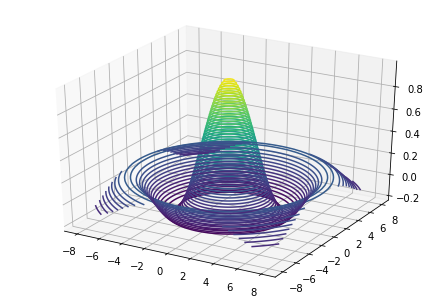

In [76]:
fig=plt.figure()
ax=mplot3d.Axes3D(fig)
ax.contour3D(x.numpy(),y.numpy(),z.numpy(),50)
plt.show()

**5.7 经典数据集加载**

In [77]:
import tensorflow as t
from tensorflow import keras
from tensorflow.keras import datasets

(x,y),(x_test,y_test)=datasets.mnist.load_data()
print('x:',x.shape,' y:',y.shape,' x_test:',x_test.shape,' y_test:',y_test.shape)

train_db=tf.data.Dataset.from_tensor_slices((x,y))

11501568/11490434 [==============================] - 0s 0us/step
x: (60000, 28, 28)  y: (60000,)  x_test: (10000, 28, 28)  y_test: (10000,)


In [78]:
#5.7.1 随机打散
train_db = train_db.shuffle(10000)

for x,y in train_db:
    break
print(x.shape,y.shape)

(28, 28) ()


In [79]:
#5.7.2 随机打散
train_db = train_db.batch(128)

for x,y in train_db:
    break
print(x.shape,y.shape)

(128, 28, 28) (128,)


In [80]:
#5.7.3 预处理
def preprocess(x,y):
    x=tf.cast(x,dtype=tf.float32)
    x=tf.reshape(x,[-1,28*28])
    y=tf.cast(y,dtype=tf.int32)
    y=tf.one_hot(y,depth=10)
    return x,y

train_db = train_db.map(preprocess)

for x,y in train_db:
    break
print(x.shape,y.shape)

(128, 784) (128, 10)


**5.8 MNIST测试代码**

In [81]:
#%%
import  matplotlib
from    matplotlib import pyplot as plt
# Default parameters for plots
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.titlesize'] = 20
matplotlib.rcParams['figure.figsize'] = [9, 7]
matplotlib.rcParams['font.family'] = ['STKaiTi']
matplotlib.rcParams['axes.unicode_minus']=False 
import  tensorflow as tf
from    tensorflow import keras
from    tensorflow.keras import datasets, layers, optimizers
import  os

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
print(tf.__version__)

2.6.0


In [82]:
def preprocess(x, y): 
    # [b, 28, 28], [b]
    print(x.shape,y.shape)
    x = tf.cast(x, dtype=tf.float32) / 255.
    x = tf.reshape(x, [-1, 28*28])
    y = tf.cast(y, dtype=tf.int32)
    y = tf.one_hot(y, depth=10)

    return x,y

#%%
(x, y), (x_test, y_test) = datasets.mnist.load_data()
print('x:', x.shape, 'y:', y.shape, 'x test:', x_test.shape, 'y test:', y_test)
#%%
batchsz = 512
train_db = tf.data.Dataset.from_tensor_slices((x, y))
train_db = train_db.shuffle(1000).batch(batchsz).map(preprocess).repeat(20)

x: (60000, 28, 28) y: (60000,) x test: (10000, 28, 28) y test: [7 2 1 ... 4 5 6]
(None, 28, 28) (None,)


In [83]:
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_db = test_db.shuffle(1000).batch(batchsz).map(preprocess)
x,y = next(iter(train_db))
print('train sample:', x.shape, y.shape)
# print(x[0], y[0])

(None, 28, 28) (None,)
train sample: (512, 784) (512, 10)


0 loss: 0.6260975003242493
0 Evaluate Acc: 0.1083
80 loss: 0.1753639280796051
80 Evaluate Acc: 0.1876
160 loss: 0.13979656994342804
160 Evaluate Acc: 0.307
240 loss: 0.1220727190375328
240 Evaluate Acc: 0.3903
320 loss: 0.10991468280553818
320 Evaluate Acc: 0.4547
400 loss: 0.10065893828868866
400 Evaluate Acc: 0.4963
480 loss: 0.09770618379116058
480 Evaluate Acc: 0.5285
560 loss: 0.09151245653629303
560 Evaluate Acc: 0.5565
640 loss: 0.08253826200962067
640 Evaluate Acc: 0.5786
720 loss: 0.07936979085206985
720 Evaluate Acc: 0.598
800 loss: 0.07686664164066315
800 Evaluate Acc: 0.6138
880 loss: 0.07661114633083344
880 Evaluate Acc: 0.6286
960 loss: 0.07586880028247833
960 Evaluate Acc: 0.6417
1040 loss: 0.0780496820807457
1040 Evaluate Acc: 0.6541
1120 loss: 0.07242505997419357
1120 Evaluate Acc: 0.6629
1200 loss: 0.06844206899404526
1200 Evaluate Acc: 0.6712
1280 loss: 0.0667424201965332
1280 Evaluate Acc: 0.6839
1360 loss: 0.07076631486415863
1360 Evaluate Acc: 0.6897
1440 loss: 0.

findfont: Font family ['STKaiTi'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 35757 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 32451 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35757 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 35757 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: 

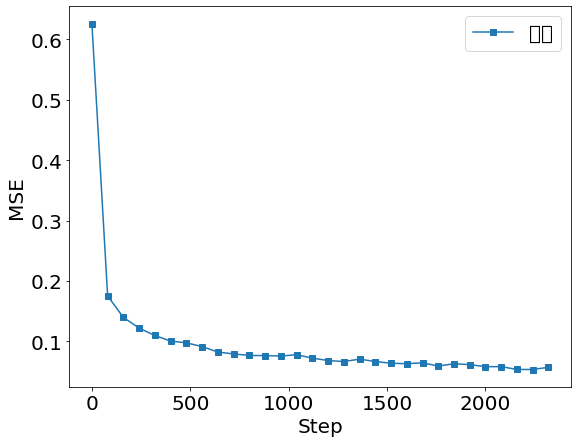

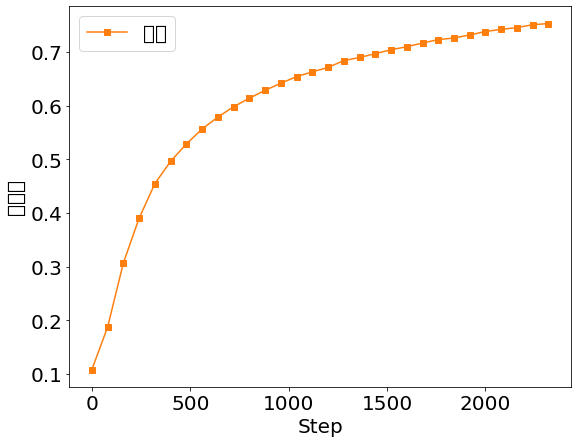

In [84]:
#%%
def main():

    # learning rate
    lr = 1e-2
    accs,losses = [], []

    # 784 => 512
    w1, b1 = tf.Variable(tf.random.normal([784, 256], stddev=0.1)), tf.Variable(tf.zeros([256]))
    # 512 => 256
    w2, b2 = tf.Variable(tf.random.normal([256, 128], stddev=0.1)), tf.Variable(tf.zeros([128]))
    # 256 => 10
    w3, b3 = tf.Variable(tf.random.normal([128, 10], stddev=0.1)), tf.Variable(tf.zeros([10]))

    for step, (x,y) in enumerate(train_db):
 
        # [b, 28, 28] => [b, 784]
        x = tf.reshape(x, (-1, 784))

        with tf.GradientTape() as tape:

            # layer1.
            h1 = x @ w1 + b1
            h1 = tf.nn.relu(h1)
            # layer2
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)
            # output
            out = h2 @ w3 + b3
            # out = tf.nn.relu(out)

            # compute loss
            # [b, 10] - [b, 10]
            loss = tf.square(y-out)
            # [b, 10] => scalar
            loss = tf.reduce_mean(loss)

 
        grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3]) 
        for p, g in zip([w1, b1, w2, b2, w3, b3], grads):
            p.assign_sub(lr * g)


        # print
        if step % 80 == 0:
            print(step, 'loss:', float(loss))
            losses.append(float(loss))
 
        if step %80 == 0:
            # evaluate/test
            total, total_correct = 0., 0

            for x, y in test_db:
                # layer1.
                h1 = x @ w1 + b1
                h1 = tf.nn.relu(h1)
                # layer2
                h2 = h1 @ w2 + b2
                h2 = tf.nn.relu(h2)
                # output
                out = h2 @ w3 + b3
                # [b, 10] => [b]
                pred = tf.argmax(out, axis=1)
                # convert one_hot y to number y
                y = tf.argmax(y, axis=1)
                # bool type
                correct = tf.equal(pred, y)
                # bool tensor => int tensor => numpy
                total_correct += tf.reduce_sum(tf.cast(correct, dtype=tf.int32)).numpy()
                total += x.shape[0]

            print(step, 'Evaluate Acc:', total_correct/total)

            accs.append(total_correct/total)


    plt.figure()
    x = [i*80 for i in range(len(losses))]
    plt.plot(x, losses, color='C0', marker='s', label='训练')
    plt.ylabel('MSE')
    plt.xlabel('Step')
    plt.legend()
    plt.savefig('train.svg')

    plt.figure()
    plt.plot(x, accs, color='C1', marker='s', label='测试')
    plt.ylabel('准确率')
    plt.xlabel('Step')
    plt.legend()
    plt.savefig('test.svg')

main()